<a href="https://colab.research.google.com/github/wel51x/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/My_LS_DS_431_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The Input Layer is what receives input from our dataset.
### Hidden Layer:
Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer. They're inside of the network and can't be accessed from without.
### Output Layer:
The final layer is called the Output Layer. The purpose of the output layer is to output a vector of values that is in a format that is suitable for the type of problem that we're trying to address. 
### Neuron:
![Wikipedia Neuron Diagram](http://www.ryanleeallred.com/wp-content/uploads/2019/03/Screen-Shot-2019-03-31-at-10.19.43-PM.png)
In biology, a neuron is a basic building block of the brain, a cell that receives signals at the dendrite of the cell and sends them to the cell body. If the received signals surpass a certain threshold with a given timing then the neuron fires sending a large spike of energy down the axon and through the axon terminals to other neurons down the line (reference above diagram). In AI a 'neuron' is one node in a neural network. It receives information from previous nodes in a network, computes an output based on weights given to those pieces of information, and passes on a output to other nodes via an activation function.
### Weight:
a Constant or function that assist in transforming an input into an output
### Activation Function:
The activation function decides whether a cell "fires" or not. Sometimes it is said that the cell is "activated" or not.
### Node Map:
A visual diagram of the architecture or "topology" of our neural network.
### Perceptron:
![Fig](http://www.ryanleeallred.com/wp-content/uploads/2019/04/Screen-Shot-2019-04-01-at-2.34.58-AM.png)
A perceptron is just a single node or neuron of a neural network with nothing else. It can take any number of inputs and spit out an output. What a neuron does is it takes each of the input values, multplies each of them by a weight, sums all of these products up, and then passes the sum through what is called an "activation function" the result of which is the final value.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import numpy as np
np.random.seed(1)

inputs = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1]    
])

correct_outputs = [[1], [0], [1], [1]]

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [25]:
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [26]:
for iteration in range(1000):
  weighted_sum = np.dot(inputs, weights)
  #print("weighted_sum = ", weighted_sum.T)
  activated_output = sigmoid(weighted_sum)
  #print("activated_output = ", activated_output.T)
  error = correct_outputs - activated_output
  #print("error = ", error.T)
  sd = sigmoid_derivative(activated_output)
  #print("sigmoid derivative = ", sd.T)
  adjustments = error * sd
  #print("adjustments = ", adjustments.T)
  weights += np.dot(inputs.T, adjustments)
  #print("weights = ", weights.T, '\n')

print("Weights after training:")
print(weights)

print("\nOutput after training:")
print(activated_output)

Weights after training:
[[-7.19423209]
 [-7.19423187]
 [10.8471645 ]]

Output after training:
[[0.99998048]
 [0.02818752]
 [0.97471496]
 [0.97471496]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

###1. Titanic

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/wel51x/Data/master/titanic.csv')

# Grab 50 versicolor and 50 virginica
df.iloc[141:150]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
141,1,3,Mrs. Pekka Pietari (Elin Matilda Dolck) Hakkar...,female,24.0,1,0,15.8500
142,0,3,Mr. Jeremiah Burke,male,19.0,0,0,6.7500
143,0,2,Mr. Edgardo Samuel Andrew,male,18.0,0,0,11.5000
144,0,2,Mr. Joseph Charles Nicholls,male,19.0,1,1,36.7500
145,1,3,Mr. August Edvard Andersson,male,27.0,0,0,7.7958
146,0,3,Miss. Robina Maggie Ford,female,9.0,2,2,34.3750
147,0,2,Mr. Michel Navratil,male,36.5,0,2,26.0000
148,0,2,Rev. Thomas Roussel Davids Byles,male,42.0,0,0,13.0000
149,0,2,Rev. Robert James Bateman,male,51.0,0,0,12.5250


In [58]:
df = df[['Pclass', 'Sex', 'Age', 'Fare']]
df.sample(11)

,Pclass,Sex,Age,Fare
304,1,female,42.0,110.8833
312,2,male,43.0,26.2500
646,3,female,23.0,7.5500
663,2,male,25.0,13.0000
433,3,female,21.0,34.3750
839,3,male,34.5,6.4375
282,1,male,57.0,26.0000
149,2,male,51.0,12.5250
96,1,male,23.0,63.3583
488,3,male,21.0,7.2500


In [0]:
def clean(x):
    x = x.replace("female", '0').replace("male", '1')
    return int(x)

In [0]:
df['Sex'] = df['Sex'].apply(clean)

In [61]:
df.sample(11)

,Pclass,Sex,Age,Fare
754,3,1,34.0,8.0500
450,1,1,49.0,89.1042
651,3,0,18.0,6.7500
790,3,1,25.0,7.8958
705,1,0,22.0,151.5500
355,2,0,38.0,13.0000
510,1,0,54.0,59.4000
655,2,1,23.0,13.0000
816,1,0,52.0,93.5000
443,2,0,13.0,19.5000


In [0]:
y = df.Survived

In [63]:
(df.shape, y.shape)

((887, 4), (887,))

In [0]:
X = df.iloc[:, [2, 0]].values

In [0]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

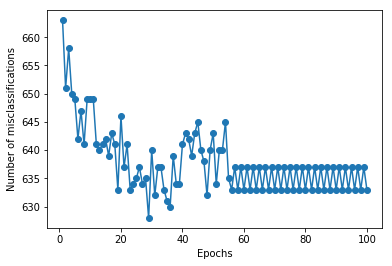

In [87]:
pn = Perceptron(0.1, 100)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


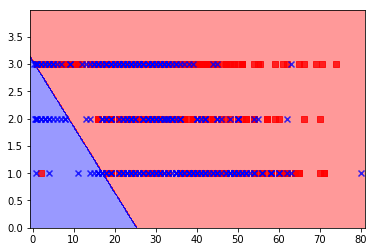

In [88]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.show()

###2. Pima Indians Diabetes dataset

Reproducing and expanding case study of Shvartser posted at Dr. Brownlee's machinelearningmastery.com
 = 3. Summarize the Dataset = 
 == 3.1 Dimensions of Dataset, shape of data == 
(768, 9)
 == 3.2 Peek at the Data, head -- first 10 items == 
   preg   plas  pres  skin   test  mass   pedi   age  class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0    1.0
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0    0.0
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0    1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0    0.0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0    1.0
5   5.0  116.0  74.0   0.0    0.0  25.6  0.201  30.0    0.0
6   3.0   78.0  50.0  32.0   88.0  31.0  0.248  26.0    1.0
7  10.0  115.0   0.0   0.0    0.0  35.3  0.134  29.0    0.0
8   2.0  197.0  70.0  45.0  543.0  30.5  0.158  53.0    1.0
9   8.0  125.0  96.0   0.0    0.0   0.0  0.232  54.0    1.0
 == 3.a data types for each attributes == 
preg     float64
plas     float64
pres     float64
sk

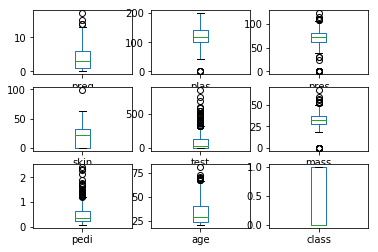

 == 4.1 Univariate Plots: histograms. why? to determine if the distribution is normal-like? == 


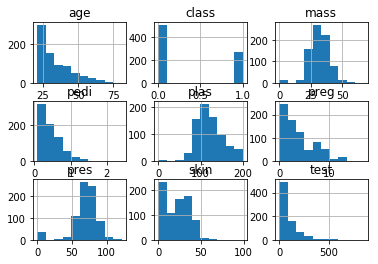

== 4.2 Multivariate Plots: Multivariate Plots:scatter plot matrix. why? to spot structured relationships between input variables ==


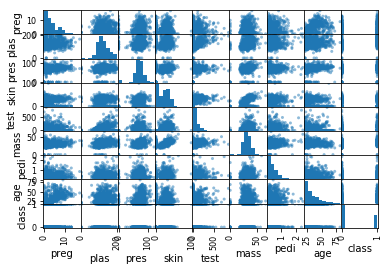

== 4.a Generating data sets ==
diabetes_attr: unchanged, original attributes
normalized_attr: range of 0 to 1
standardized_attr: mean of 0 and stdev of 1
                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.544261e-17  3.614007e-18 -1.327244e-17  7.994184e-17 -3.556183e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.295979e-16  2.398978e-16 

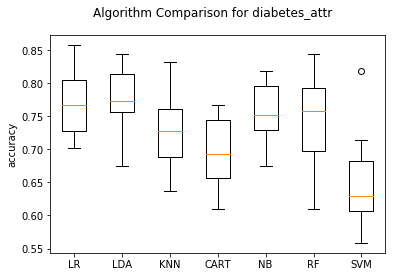

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

= normalized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.761740 (0.052185) False nan
LDA: 0.773462 (0.051592) True 0.029369
KNN: 0.744754 (0.060567) False 0.219454
CART: 0.704272 (0.062885) True 0.001841
NB: 0.755178 (0.042766) False 0.481693
RF: 0.733066 (0.048720) True 0.004040
SVM: 0.763004 (0.056922) False 0.803644
 == 5.4 Select Best Model, Compare Algorithms == 


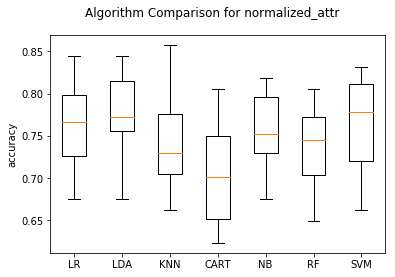

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

= standardized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.779956 (0.050088) False nan
LDA: 0.773462 (0.051592) False 0.138185
KNN: 0.742139 (0.071500) True 0.039198
CART: 0.688671 (0.071892) True 0.000080
NB: 0.755178 (0.042766) True 0.003418
RF: 0.733100 (0.072494) True 0.001545
SVM: 0.764286 (0.056962) False 0.051041
 == 5.4 Select Best Model, Compare Algorithms == 


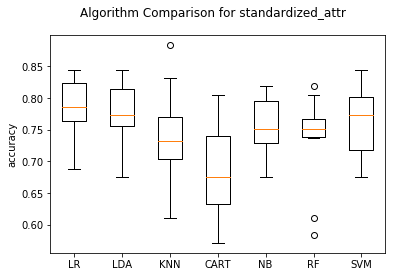

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

= impute_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.765636 (0.047532) False nan
LDA: 0.766951 (0.052975) False 0.820491
KNN: 0.713534 (0.064980) True 0.012597
CART: 0.690072 (0.053039) True 0.000181
NB: 0.747386 (0.043583) False 0.203854
RF: 0.748684 (0.040875) False 0.082655
SVM: 0.651025 (0.072141) True 0.000537
 == 5.4 Select Best Model, Compare Algorithms == 


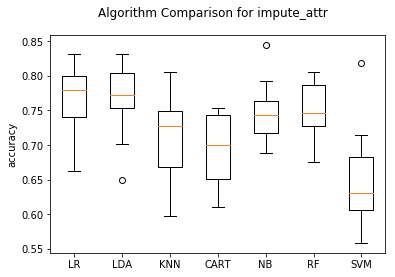

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

= missing_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.762500 (0.092905) False nan
LDA: 0.788077 (0.094197) False 0.118110
KNN: 0.714295 (0.090356) True 0.009626
CART: 0.732436 (0.101582) False 0.344042
NB: 0.775256 (0.067309) False 0.465077
RF: 0.767756 (0.089361) False 0.578441
SVM: 0.668462 (0.085965) True 0.009042
 == 5.4 Select Best Model, Compare Algorithms == 


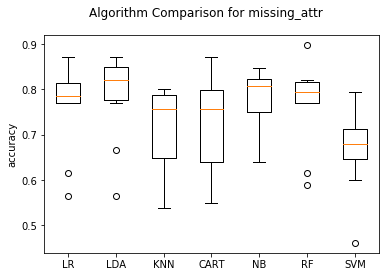

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

= undersampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.764675 (0.070828) False nan
LDA: 0.746087 (0.060905) True 0.023816
KNN: 0.690391 (0.055435) True 0.007342
CART: 0.673410 (0.055427) True 0.000200
NB: 0.718274 (0.052331) True 0.012676
RF: 0.725786 (0.045713) True 0.049306
SVM: 0.442034 (0.040941) True 0.000001
 == 5.4 Select Best Model, Compare Algorithms == 


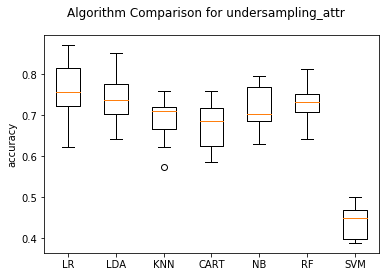

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

= oversampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.750000 (0.022804) False nan
LDA: 0.745000 (0.030083) False 0.452546
KNN: 0.733000 (0.031321) False 0.089983
CART: 0.736000 (0.049031) False 0.443332
NB: 0.736000 (0.030067) True 0.044504
RF: 0.802000 (0.035721) True 0.001312
SVM: 0.679000 (0.055937) True 0.012109
 == 5.4 Select Best Model, Compare Algorithms == 


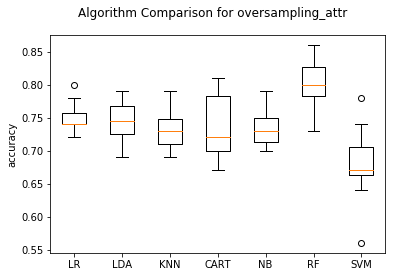

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

logr.best_score= 0.7490272373540856
logr.best_estimator_.C= 1
logr.best_estimator_.penalty= l1
baseline accuracy on X_test without grid search= 0.7559055118110236
accuracy with grid search selected C and penalty_model, and before storing to disk 0.7559055118110236
accuracy on X_test after loading from disk= 0.7559055118110236
delta0_predictions
accuracy_score= 0.7559055118110236
tn, fp, fn, tp: 121 41 21 71
sensitivity_tpr,specificity_tnr: 0.6339285714285714 0.7469135802469136
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       162
         1.0       0.63      0.77      0.70        92

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.76      0.75       254
weighted avg       0.77      0.76      0.76       254

delta0_roc_auc: 0.8354133118625873


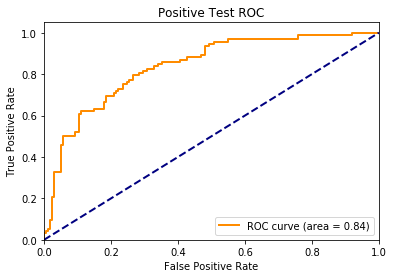

loaded_model.self.classes_ [0. 1.]
deltaX,sensitivity_tpr,specificity_tnr: -0.02 0.7717391304347826 0.7407407407407407
confusion_matrix: tn, fp, fn, tp: 120 42 21 71
deltaX,sensitivity_tpr,specificity_tnr: 0 0.7717391304347826 0.7469135802469136
confusion_matrix: tn, fp, fn, tp: 121 41 21 71
deltaX,sensitivity_tpr,specificity_tnr: 0.02 0.7608695652173914 0.7530864197530864
confusion_matrix: tn, fp, fn, tp: 122 40 22 70
deltaX,sensitivity_tpr,specificity_tnr: 0.04 0.75 0.7654320987654321
confusion_matrix: tn, fp, fn, tp: 124 38 23 69
deltaX,sensitivity_tpr,specificity_tnr: 0.06 0.7391304347826086 0.7654320987654321
confusion_matrix: tn, fp, fn, tp: 124 38 24 68
deltaX,sensitivity_tpr,specificity_tnr: 0.08 0.7282608695652174 0.7654320987654321
confusion_matrix: tn, fp, fn, tp: 124 38 25 67
deltaX,sensitivity_tpr,specificity_tnr: 0.1 0.7282608695652174 0.7716049382716049
confusion_matrix: tn, fp, fn, tp: 125 37 25 67
deltaX,sensitivity_tpr,specificity_tnr: 0.12 0.717391304347826 0.7777777

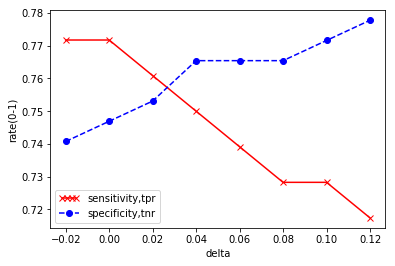

cross-over of sensitivity and specificity lie at about delta= -0.1
accuracy_score= 0.7362204724409449
confusion_matrix: tn, fp, fn, tp: 111 51 16 76
deltaX,sensitivity_tpr,specificity_tnr: -0.1 0.8260869565217391 0.6851851851851852
              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77       162
         1.0       0.60      0.83      0.69        92

   micro avg       0.74      0.74      0.74       254
   macro avg       0.74      0.76      0.73       254
weighted avg       0.77      0.74      0.74       254



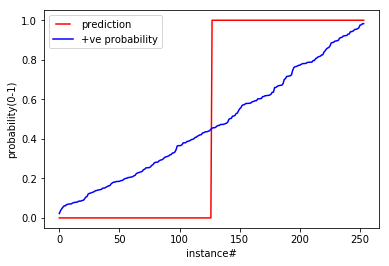

In [49]:
# Appropriated from https://github.com/dr-riz/diabetes/blob/master/diabetes.py
import warnings
warnings.filterwarnings("ignore")
print("Reproducing and expanding case study of Shvartser posted at Dr. Brownlee's machinelearningmastery.com")

# preproc imports
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
import numpy
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# algo eval imports
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# fine tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# significance tests
import scipy.stats as stats
import math

# build and save model using Pickle
from random import *
import pickle

# final model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

datafile="https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv"
headers=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset=pandas.read_csv(datafile, names=headers, skiprows=1)
dataset=dataset.astype(float)
#print(dataset.sample(11))

print(" = 3. Summarize the Dataset = ")
# shape
print(" == 3.1 Dimensions of Dataset, shape of data == ")
print(dataset.shape)

# head
print(" == 3.2 Peek at the Data, head -- first 10 items == ")
print(dataset.head(10))

# data types
print(" == 3.a data types for each attributes == ")
print(dataset.dtypes)

# descriptions
print(" == 3.3 Statistical Summary == ")
print(dataset.describe())

# class distribution
print(" == 3.4 class distribution  ==")
print(dataset.groupby('class').size())

print(" = 4. Data Visualization = ")
# box and whisker plots
print(" == 4.1 Univariate Plots: box and whisker plots. why? to determine outliers? = ")
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# histograms
print(" == 4.1 Univariate Plots: histograms. why? to determine if the distribution is normal-like? == ")
dataset.hist()
plt.show()

# scatter plot matrix
print("== 4.2 Multivariate Plots: Multivariate Plots:scatter plot matrix. why? to spot structured relationships between input variables ==")
scatter_matrix(dataset)
plt.show()

numpy.set_printoptions(precision=3)
array = numpy.array(dataset.values)

print("== 4.a Generating data sets ==")

print("diabetes_attr: unchanged, original attributes")
diabetes_attr = array[:,0:8]
label = array[:,8] #unchanged across preprocessing?
diabetes_df = pandas.DataFrame(diabetes_attr)

print("normalized_attr: range of 0 to 1")
scaler = preproc.MinMaxScaler().fit(diabetes_attr)
normalized_attr = scaler.transform(diabetes_attr)
normalized_df = pandas.DataFrame(normalized_attr)
#print(normalized_df.describe())

print("standardized_attr: mean of 0 and stdev of 1")
#scaler = preproc.StandardScaler().fit(diabetes_attr)
#standardized_attr = scaler.transform(diabetes_attr)
standardized_attr = preproc.scale(diabetes_attr)
standardized_df = pandas.DataFrame(standardized_attr)
print(standardized_df.describe())


print("== 4.b treating missing values by purging or imputating ==")
## missing.arff
print("=== Assuming, zero indicates missing values === ")
print("missing values by count")
print((dataset[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']] == 0).sum())
print("=== purging ===")
# make a copy of original data set
dataset_cp = dataset.copy(deep=True)

dataset_cp[['plas', 'pres', 'skin', 'test', 'mass']] = dataset_cp[['plas', 'pres', 'skin', 'test', 'mass']].replace(0, numpy.NaN)

# print the first 10 rows of data
print(dataset_cp.head(10))

# count the number of NaN values in each column
print(dataset_cp.isnull().sum())

# dataset with missing values
dataset_missing = dataset_cp.dropna()

# summarize the number of rows and columns in the dataset
print(dataset_cp.shape)

missing_attr = numpy.array(dataset_missing.values[:,0:8])
missing_label = numpy.array(dataset_missing.values[:,8])

print("=== imputing by replacing missing values with mean column values ===")

dataset_impute = dataset_cp.fillna(dataset_cp.mean())
# count the number of NaN values in each column
print(dataset_impute.isnull().sum())

print("== 4.c addressing class imbalance under or over sampling ==")

impute_attr = numpy.array(dataset_impute.values[:,0:8])

print("=== undersampling majority class by purging ===")

# Separate majority and minority classes
df_majority = dataset[dataset['class']==0]
df_minority = dataset[dataset['class']==1]

print("df_minority['class'].size", df_minority['class'].size)

# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                          replace=False,    # sample without replacement
                          n_samples=df_minority['class'].size,  # match minority class
                          random_state=7) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pandas.concat([df_majority_downsampled, df_minority])
 
print("undersampled", df_downsampled.groupby('class').size()) 
df_downsampled=df_downsampled.sample(frac=1).reset_index(drop=True)
undersampling_attr = numpy.array(df_downsampled.values[:,0:8])
undersampling_label = numpy.array(df_downsampled.values[:,8])

print("=== oversampling minority class with SMOTE ===")

sm = SMOTE(random_state=7)
x_val = dataset.values[:,0:8]
y_val = dataset.values[:,8]
X_res, y_res = sm.fit_sample(x_val, y_val)

features=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
oversampled_df = pandas.DataFrame(X_res)
oversampled_df.columns = features
oversampled_df = oversampled_df.assign(label = numpy.asarray(y_res))
oversampled_df = oversampled_df.sample(frac=1).reset_index(drop=True)

oversampling_attr = oversampled_df.values[:,0:8]
oversampling_label = oversampled_df.values[:,8]

print("oversampled_df", oversampled_df.groupby('label').size()) 


print(" = 5. Evaluate Some Algorithms = ")
# Split-out validation dataset
print(" == 5.1 Create a Validation Dataset: Split-out validation dataset == ")

# Test options and evaluation metric
print(" == 5.2 Test Harness: Test options and evaluation metric == ")
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
print("== 5.3 Build Models: build and evaluate our five models, Spot Check Algorithms ==")
datasets = []
datasets.append(('diabetes_attr', diabetes_attr, label))
datasets.append(('normalized_attr', normalized_attr, label))
datasets.append(('standardized_attr', standardized_attr, label))
datasets.append(('impute_attr', impute_attr, label))
datasets.append(('missing_attr', missing_attr, missing_label))
datasets.append(('undersampling_attr', undersampling_attr, undersampling_label))
datasets.append(('oversampling_attr', oversampling_attr, oversampling_label))

models = []
models.append(('LR', LogisticRegression())) # based on imbalanced datasets and default parameters
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

print("eval metric: " + scoring)
for dataname, attributes, target in datasets:
	# evaluate each model in turn
	results = []
	names = []
	print("= " + dataname + " = ")
	print("algorithm,mean,std,signficance,p-val")
	for name, model in models:
		kfold = model_selection.KFold(n_splits=10, random_state=seed)
		cv_results = model_selection.cross_val_score(model, attributes, target, cv=kfold, scoring=scoring)
		results.append(cv_results)
		#print("cv_results")
		#print(cv_results)
		names.append(name)
		
		t, prob = stats.ttest_rel(a= cv_results,b= results[0])
		#print("LR vs ", name, t,prob)
		# Below 0.05, significant. Over 0.05, not significant. 
		# http://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005
		statistically_different = (prob < 0.05)
		
		msg = "%s: %f (%f) %s %f" % (name, cv_results.mean(), cv_results.std(), statistically_different, prob)
		print(msg)

	# Compare Algorithms
	print(" == 5.4 Select Best Model, Compare Algorithms == ")
	fig = plt.figure()
	fig.suptitle('Algorithm Comparison for ' + dataname)
	ax = fig.add_subplot(111) # what does 111 mean?
	plt.boxplot(results)
	plt.ylabel(scoring)
	ax.set_xticklabels(names)
	plt.show()
	display(plt)

test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_attr, label, test_size=test_size,
random_state=seed)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2','l1']}
logr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring='accuracy')
logr.fit(X_train, Y_train)
print("logr.best_score=",logr.best_score_)
print("logr.best_estimator_.C=",logr.best_estimator_.C)
print("logr.best_estimator_.penalty=",logr.best_estimator_.penalty)

#building model for baseline
model = LogisticRegression(class_weight='balanced')
y_score = model.fit(diabetes_attr, label)
result = model.score(X_test, Y_test) # determine r2 value
print("baseline accuracy on X_test without grid search=",result)

#building model with grid search selected parameters
model = LogisticRegression(class_weight='balanced',C=logr.best_estimator_.C, penalty=logr.best_estimator_.penalty)
y_score = model.fit(diabetes_attr, label)
result = model.score(X_test, Y_test) # determine r2 value
print("accuracy with grid search selected C and penalty_model, and before storing to disk", result)

# save the model to disk
filename = 'diabetes_py_model.sav' 
pickle.dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test)

print("accuracy on X_test after loading from disk=",result)

delta0_predictions=loaded_model.predict(X_test)
print("delta0_predictions")
print("accuracy_score=",accuracy_score(Y_test, delta0_predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, delta0_predictions).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
sensitivity_tpr = float(tp)/(float(tp)+float(fp))
specificity_tnr = float(tn)/(float(tn)+float(fp))
print("sensitivity_tpr,specificity_tnr:", sensitivity_tpr,specificity_tnr)
print(classification_report(Y_test, delta0_predictions))

delta0_probs=loaded_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, delta0_probs[:, 1])
roc_auc = auc(fpr, tpr)
print("delta0_roc_auc:", roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Test ROC')
plt.legend(loc="lower right")
plt.show()

print("loaded_model.self.classes_",loaded_model.classes_)
delta_range=[-.02, 0, 0.02, 0.04, 0.06, 0.08, .10, .12]
i=0
sensitivity_tpr=[0.0] * len(delta_range)
specificity_tnr=[0.0] * len(delta_range)
for delta in delta_range:	
	probs=loaded_model.predict_proba(X_test)
	report = [[ins[0], ins[1], 1] if (ins[1] > (ins[0]+delta)) else [ins[0], ins[1], 0] for ins in probs]
	report_df = pandas.DataFrame(report, columns=['neg_prob','pos_prob','pred'])
	predictions = numpy.array(report_df.values)[:,2]
	tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
	sensitivity_tpr[i]= float(tp)/(float(tp)+float(fn))
	specificity_tnr[i]= float(tn)/(float(tn)+float(fp))
	print("deltaX,sensitivity_tpr,specificity_tnr:", delta, sensitivity_tpr[i],specificity_tnr[i]) 
	#print("accuracy_score=",accuracy_score(Y_test, predictions))
	print("confusion_matrix: tn, fp, fn, tp:", tn, fp, fn, tp)
	#print(classification_report(Y_test, predictions))
	i=i+1

from matplotlib.legend_handler import HandlerLine2D

plt.clf()
pred_legend,=plt.plot(delta_range, sensitivity_tpr, 'r', marker='x', label="sensitivity,tpr") 
prob_legend,=plt.plot(delta_range, specificity_tnr, 'b', linestyle='--', marker='o', label="specificity,tnr")
plt.legend(handler_map={pred_legend: HandlerLine2D(numpoints=4)})
plt.xlabel('delta')
plt.ylabel('rate(0-1)')
plt.show()

delta=-0.10
print("cross-over of sensitivity and specificity lie at about delta=", delta)
report=[[ins[0], ins[1], 1] if (ins[1] > (ins[0]+delta)) else [ins[0], ins[1], 0] for ins in probs]
report_df=pandas.DataFrame(report, columns=['neg_prob','pos_prob','pred'])
predictions=numpy.array(report_df.values)[:,2]
positive_prob=numpy.array(report_df.values)[:,1]

print("accuracy_score=",accuracy_score(Y_test, predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
print("confusion_matrix: tn, fp, fn, tp:", tn, fp, fn, tp)
sensitivity_tpr= float(tp)/(float(tp)+float(fn))
specificity_tnr= float(tn)/(float(tn)+float(fp))
print("deltaX,sensitivity_tpr,specificity_tnr:", delta, sensitivity_tpr,specificity_tnr) 
print(classification_report(Y_test, predictions))

# sort instances by (a) class, and then (b) positive probability for plotting
report_df=report_df.sort_values(by=['pred','pos_prob'])
predictions=numpy.array(report_df.values)[:,2]
positive_prob=numpy.array(report_df.values)[:,1]

plt.clf()
pred_legend,=plt.plot(predictions, 'r', label="prediction") 
prob_legend,=plt.plot(positive_prob, 'b', label="+ve probability")

plt.legend(handler_map={pred_legend: HandlerLine2D(numpoints=4)})
plt.xlabel('instance#')
plt.ylabel('probability(0-1)')

plt.show()

In [0]:
import pylab as pl
import numpy as np


In [0]:
pima = np.loadtxt('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv', delimiter=',', skiprows=1)


In [0]:
indices0 = np.where(pima[:,8]==0)
indices1 = np.where(pima[:,8]==1)


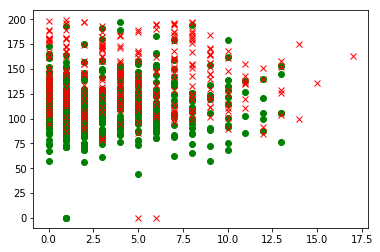

In [12]:
pl.ion();
pl.plot(pima[indices0,0],pima[indices0,1],'go');
pl.plot(pima[indices1,0],pima[indices1,1],'rx');


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?